This is the 1 epoch
Mean Square error:8.75363540649414
This is the 2 epoch
Mean Square error:17.275732040405273
This is the 3 epoch
Mean Square error:0.2622520923614502
This is the 4 epoch
Mean Square error:0.26824116706848145
This is the 5 epoch
Mean Square error:0.16347374022006989
This is the 6 epoch
Mean Square error:0.1299060434103012
This is the 7 epoch
Mean Square error:0.13850204646587372
This is the 8 epoch
Mean Square error:0.1981193870306015
This is the 9 epoch
Mean Square error:0.27889901399612427
This is the 10 epoch
Mean Square error:0.31209835410118103
This is the 11 epoch
Mean Square error:0.3909510374069214
This is the 12 epoch
Mean Square error:0.4684397578239441
This is the 13 epoch
Mean Square error:0.5076048374176025
This is the 14 epoch
Mean Square error:0.48367419838905334
This is the 15 epoch
Mean Square error:0.5022761225700378
This is the 16 epoch
Mean Square error:0.4822232127189636
This is the 17 epoch
Mean Square error:0.47337445616722107
This is the 18 epo

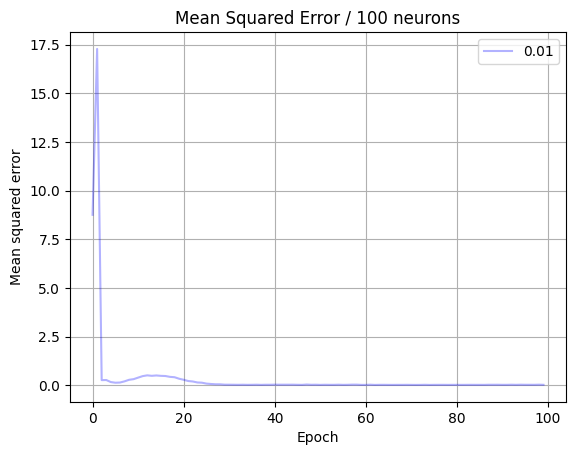

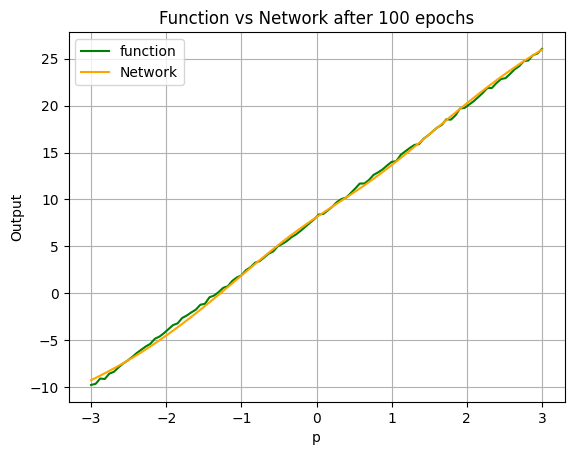

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import torch

dtype = torch.float
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

def main():
    epochs=100
    s = 100
    lr = 0.01

    error_list = []
    epoch_list = []


    W_1, b_1, W_2, b_2 = parameter_initialize(s) 

    for epoch in range(epochs):
        print("This is the {} epoch".format(epoch + 1))
        epoch_list.append(epoch)
        p = torch.linspace(-3,3,100,dtype = dtype, device=device).reshape(100,1)
        sum = 0
        for iter in range(p.shape[0]):

            a_0 = p[iter][0].reshape(1, 1)

            output, n_2, a_1, n_1 = forward(a_0, W_1, W_2, b_1, b_2)
            target = approximate_function(a_0)
            error = target - output
            square_error = (error.reshape(-1)[0]) * (error.reshape(-1)[0])
            sum += square_error

            s_1, s_2 = backward(error, a_1, W_2)
            W_2, W_1, b_2, b_1 = Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0)
        mean_square_error = sum/p.shape[0]
        print("Mean Square error:{}".format(mean_square_error))
        error_list.append(mean_square_error)

    #TODO: Plot
    y = []
    for x in p.reshape(-1):
        y.append(approximate_function(x))

    plot_error(lr, s, epoch_list, error_list)
    plot_function(p,y)
    plot_network(W_2, W_1, b_2, b_1, p, epochs)




def parameter_initialize(s): 
    W_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    b_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    W_2 = torch.randn(1,s, dtype = dtype, device=device) - 0.5
    b_2 = torch.randn(1,1, dtype = dtype, device=device) - 0.5
    return W_1, b_1, W_2, b_2

def forward(a_0, W_1, W_2, b_1, b_2): 

    n_1 = W_1.mm(a_0) + b_1
    a_1 = []

    for i in range(n_1.shape[0]):
          a_1.append(float(1)/(1+math.exp(-n_1[i])))

    a_1 = torch.tensor(a_1, device=device).float().reshape(-1,1)

    n_2 = W_2.mm(a_1) + b_2
    a_2 = n_2

    return a_2,n_2,a_1,n_1

def backward(error, a_1, W_2): 

     s_2 = -2*1*error

     # TODO
     F_1 = []
     for i in range(a_1.shape[0]):
         F_1.append((1-a_1[i][0])*a_1[i][0])
     F_1 = torch.tensor(F_1, device=device).float().reshape(-1)
     F_1 = torch.diag(F_1)

     s_1 = F_1.mm(W_2.t())
     s_1 = s_1.mm(s_2)


     return s_1, s_2

def Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0 ): #update parameter

    W_2_new = W_2 - lr*s_2.mm(a_1.t())

    b_2_new = b_2 - lr*s_2

    W_1_new = W_1 - lr*s_1.mm(a_0.t())

    b_1_new = b_1 - lr*s_1

    return W_2_new, W_1_new, b_2_new, b_1_new

def plot_error(lr,s,epoch,error):
    plt.figure()
    if lr==0.1:
        plt.plot(epoch, error, c='red', label=str(lr), alpha = 0.3)
    else:
        plt.plot(epoch, error, c='blue', label=str(lr), alpha = 0.3)

    plt.xlabel('Epoch')
    plt.ylabel('Mean squared error')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Mean Squared Error / {} neurons'.format(s))
    plt.show()

def plot_function(input,output):
    input = input.numpy()
    plt.plot(input,output, c='green', label='function')
    plt.xlabel('p')
    plt.ylabel('Output')
    plt.legend(loc='best')



def plot_network(W_2, W_1, b_2, b_1, input, epochs):
    output_list = []
    for x in input:
        x = x.reshape(1,1)
        output, n_2, a_1, n_1 = forward(x,W_1,W_2,b_1,b_2)
        output = output[0]
        output_list.append(output)
    input = input.numpy()
    plt.plot(input,output_list,c='orange',label='Network')
    plt.title('Function vs Network after {} epochs'.format(epochs))
    plt.grid(True)
    plt.legend(loc='best')

    plt.show()


def approximate_function(a_0):
    noise = torch.randn_like(a_0) * 0.1  # Adding Gaussian noise with mean 0 and standard deviation 0.1
    return a_0 * 6 + 8 + noise





if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:11.645676612854004
This is the 2 epoch
Mean Square error:1.089068055152893
This is the 3 epoch
Mean Square error:6.497900485992432
This is the 4 epoch
Mean Square error:3.691343307495117
This is the 5 epoch
Mean Square error:3.4294023513793945
This is the 6 epoch
Mean Square error:2.8632242679595947
This is the 7 epoch
Mean Square error:1.7620062828063965
This is the 8 epoch
Mean Square error:1.5103799104690552
This is the 9 epoch
Mean Square error:0.931303083896637
This is the 10 epoch
Mean Square error:0.5654311180114746
This is the 11 epoch
Mean Square error:0.6883515119552612
This is the 12 epoch
Mean Square error:0.6310586333274841
This is the 13 epoch
Mean Square error:0.47842156887054443
This is the 14 epoch
Mean Square error:0.5150030851364136
This is the 15 epoch
Mean Square error:0.455506831407547
This is the 16 epoch
Mean Square error:0.5199611783027649
This is the 17 epoch
Mean Square error:0.5002535581588745
This is the 18 epoch
Mean S

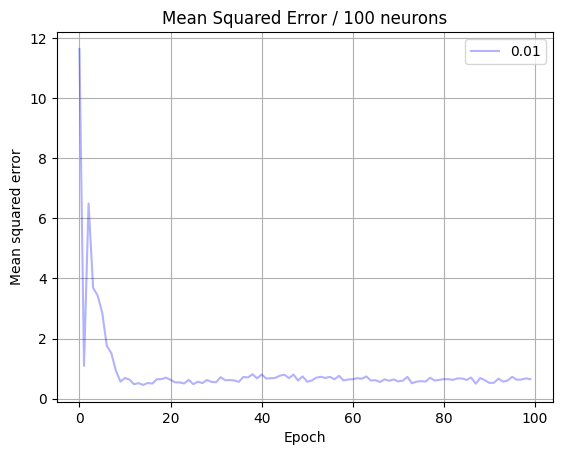

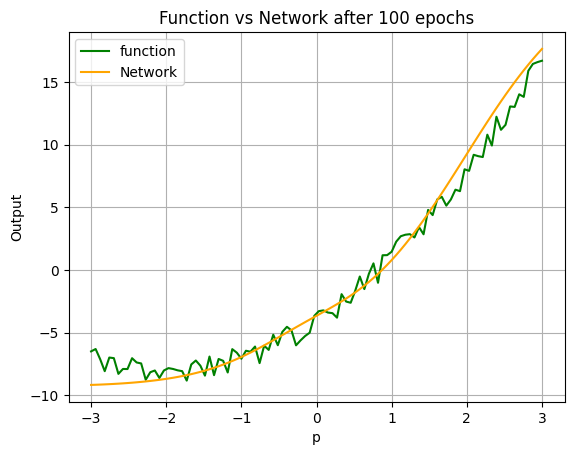

In [8]:
def approximate_function(a_0):
    noise = random.uniform(-1, 1)  # Adding uniform noise between -1 and 1
    return math.pow(a_0, 2) + a_0 * 4 - 4 + noise

if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:159.41456604003906
This is the 2 epoch
Mean Square error:29.0830135345459
This is the 3 epoch
Mean Square error:53.11504364013672
This is the 4 epoch
Mean Square error:50.9764289855957
This is the 5 epoch
Mean Square error:27.60401153564453
This is the 6 epoch
Mean Square error:20.9365177154541
This is the 7 epoch
Mean Square error:15.926971435546875
This is the 8 epoch
Mean Square error:19.483291625976562
This is the 9 epoch
Mean Square error:16.307031631469727
This is the 10 epoch
Mean Square error:22.99988555908203
This is the 11 epoch
Mean Square error:16.096588134765625
This is the 12 epoch
Mean Square error:27.296945571899414
This is the 13 epoch
Mean Square error:24.631303787231445
This is the 14 epoch
Mean Square error:23.231637954711914
This is the 15 epoch
Mean Square error:23.786611557006836
This is the 16 epoch
Mean Square error:15.807194709777832
This is the 17 epoch
Mean Square error:21.403379440307617
This is the 18 epoch
Mean Square

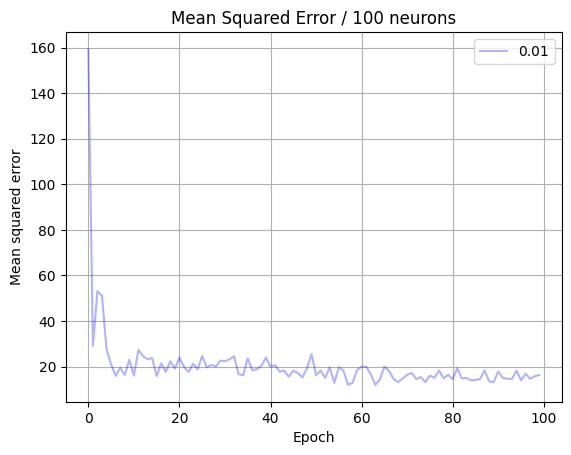

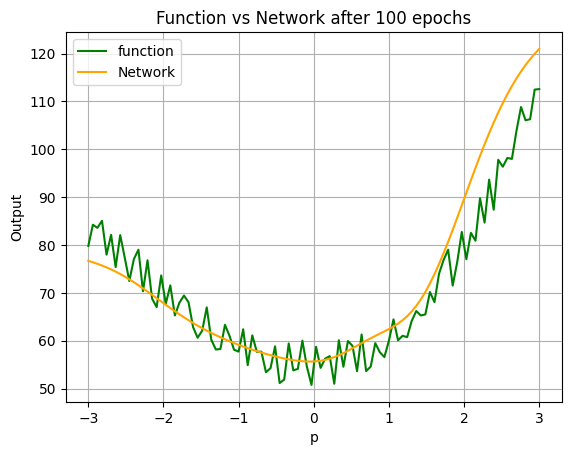

In [9]:
def approximate_function(a_0):
    noise = random.uniform(-5, 5)  # Adding uniform noise between -5 and 5
    return 0.6 * math.pow(a_0, 3) + 5 * math.pow(a_0, 2) + 55 + noise

if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:232.14439392089844
This is the 2 epoch
Mean Square error:64.00970458984375
This is the 3 epoch
Mean Square error:96.98078918457031
This is the 4 epoch
Mean Square error:76.11072540283203
This is the 5 epoch
Mean Square error:53.81025314331055
This is the 6 epoch
Mean Square error:62.184268951416016
This is the 7 epoch
Mean Square error:51.62168502807617
This is the 8 epoch
Mean Square error:66.06629180908203
This is the 9 epoch
Mean Square error:69.6366195678711
This is the 10 epoch
Mean Square error:60.288150787353516
This is the 11 epoch
Mean Square error:68.5252914428711
This is the 12 epoch
Mean Square error:55.764339447021484
This is the 13 epoch
Mean Square error:57.354976654052734
This is the 14 epoch
Mean Square error:50.12119674682617
This is the 15 epoch
Mean Square error:58.39350891113281
This is the 16 epoch
Mean Square error:45.68308639526367
This is the 17 epoch
Mean Square error:62.20901870727539
This is the 18 epoch
Mean Square erro

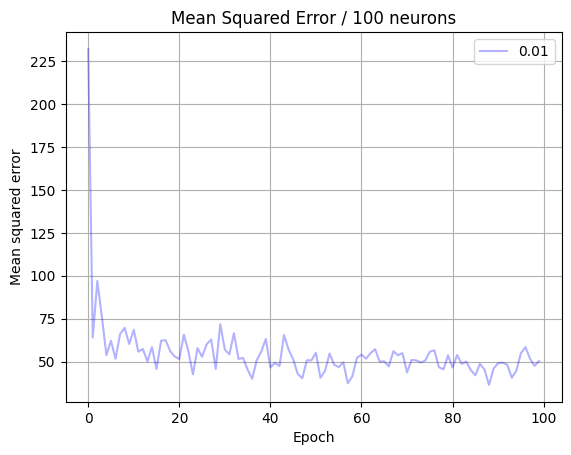

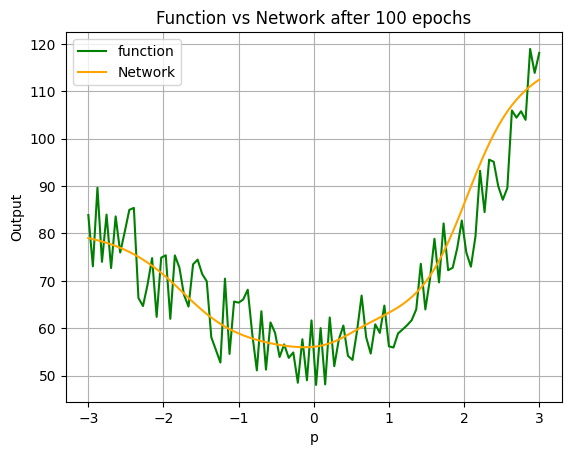

In [10]:
def approximate_function(a_0):
    noise = random.uniform(-10, 10)  # Adding uniform noise between -10 and 10
    return 0.6 * math.pow(a_0, 3) + 5 * math.pow(a_0, 2) + 55 + noise

if __name__ == '__main__':
    main()